# Introducción a Requests

Librería que nos permite hacer llamadas HTTP en Python. Es la forma más habitual a la hora de trabajar con APIs

In [ ]:
!pip install requests
import requests

In [ ]:
r = requests.get('https://es.stackoverflow.com')

In [ ]:
print(r)

<Response [200]>


In [ ]:
print(dir(r))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [ ]:
print(r.text)

In [ ]:
print(r.url)

https://es.stackoverflow.com/


In [ ]:
print(r.status_code)

200


In [ ]:
print(r.cookies)

<RequestsCookieJar[<Cookie prov=83f64e51-68e6-7317-56ce-4b936ad2dcc4 for .stackoverflow.com/>]>


In [ ]:
print(r.headers)
print(r.headers.get('Connection'))

{'Connection': 'keep-alive', 'cache-control': 'private', 'content-type': 'text/html; charset=utf-8', 'content-encoding': 'gzip', 'server': 'Microsoft-IIS/10.0', 'strict-transport-security': 'max-age=15552000', 'x-route-name': 'Home/Index', 'x-frame-options': 'SAMEORIGIN', 'x-sql-count': '1', 'x-sql-duration-ms': '3', 'x-redis-count': '1', 'x-redis-duration-ms': '0', 'x-http-count': '2', 'x-http-duration-ms': '0', 'x-te-count': '2', 'x-te-duration-ms': '1', 'x-flags': 'AA', 'x-aspnet-duration-ms': '8', 'x-request-guid': '14df3792-308f-4da1-9bd5-bac66f106fe6', 'x-is-crawler': '1', 'x-providence-cookie': '83f64e51-68e6-7317-56ce-4b936ad2dcc4', 'content-security-policy': "upgrade-insecure-requests; frame-ancestors 'self' https://stackexchange.com", 'x-page-view': '1', 'Accept-Ranges': 'bytes', 'Date': 'Sun, 27 Dec 2020 12:18:04 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-bur17557-BUR', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1609071484.132164,VS0,VE75', 'Vary': 'Accept-E

In [ ]:
if(r.status_code == 200):
  print('La petición ha sido realizada correctamente')

La petición ha sido realiza correctamente


# Introducción a IEX Cloud

Es un provedor de datos financieros que provee una API para extraer los datos


[Documentación Iex Cloud](https://iexcloud.io/support/)



# ¿Por que IEX Cloud?

1.   Capa Gratuita (50,000 mesensaje /mes) y Uso Ilimitado del Sandbox Test
2.   Buena documentación 
3.  Interfaz intuitiva con buena capacidad de Monitorización
4. Infraestructura robusta ya que utiliza la cache para almacenar peticiones realizadas con anterioridad ( Versión de Pago)
5. A nivel de pago Es un provedor que ofrece muchisimas opciones



In [ ]:
!pip install iexfinance

     |████████████████████████████████| 61kB 3.1MB/s 


In [ ]:
from iexfinance.refdata import get_symbols
from iexfinance.stocks import Stock
import pandas as pd
api_token='pk_8984ac675cbc4966b9d0cce7a634b5ed'
api_sandobox = 'Tpk_bd997f1924174db6b06d818b2dbcd3b2'

In [ ]:
get_symbols(token=api_token)

,symbol,exchange,exchangeSuffix,exchangeName,name,date,type,iexId,region,currency,isEnabled,figi,cik,lei
0,A,NYS,UN,"NEW YORK STOCK EXCHANGE, INC.",Agilent Technologies Inc.,2020-12-19,cs,IEX_46574843354B2D52,US,USD,True,BBG000C2V3D6,0001090872,QUIX8Y7A2WP0XRMW7G29
1,AA,NYS,UN,"NEW YORK STOCK EXCHANGE, INC.",Alcoa Corp,2020-12-19,cs,IEX_4238333734532D52,US,USD,True,BBG00B3T3HD3,0001675149,549300T12EZ1F6PWWU29
2,AAA,USPAC,UP,NYSE ARCA,Listed Funds Trust - AAF First Priority CLO Bo...,2020-12-19,et,IEX_5030314338392D52,US,USD,True,BBG00X5FSP48,0001683471,None
3,AAAU,USPAC,UP,NYSE ARCA,Goldman Sachs Physical Gold ETF Shares - Goldm...,2020-12-19,et,IEX_474B433136332D52,US,USD,True,BBG00LPXX872,0001708646,None
4,AACG,NAS,,NASDAQ/NMS (GLOBAL MARKET),ATA Creativity Global - ADR,2020-12-19,ad,IEX_44595A4C53392D52,US,USD,True,BBG000V2S3P6,0001420529,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299,ZUO,NYS,UN,"NEW YORK STOCK EXCHANGE, INC.",Zuora Inc - Class A,2020-12-19,cs,IEX_4D474631525A2D52,US,USD,True,BBG000BT3HG5,0001423774,549300ISVGC1YZWQJ420
9300,ZVO,NAS,,NASDAQ/NGS (GLOBAL SELECT MARKET),Zovio Inc,2020-12-19,cs,IEX_514A435352362D52,US,USD,True,BBG000C3CQP1,0001305323,None
9301,ZYME,NYS,UN,"NEW YORK STOCK EXCHANGE, INC.",Zymeworks Inc,2020-12-19,cs,IEX_5253315838322D52,US,USD,True,BBG00GD15LJ5,0001403752,894500AHOYAGYLYZJL67
9302,ZYNE,NAS,,NASDAQ/NMS (GLOBAL MARKET),Zynerba Pharmaceuticals Inc,2020-12-19,cs,IEX_4E3154424A382D52,US,USD,True,BBG007BBS8B7,0001621443,549300JLJ5VQU2CN6016


In [ ]:
a = Stock("AAPL", token=api_token)
a.get_quote()

,avgTotalVolume,calculationPrice,change,changePercent,close,closeSource,closeTime,companyName,delayedPrice,delayedPriceTime,extendedChange,extendedChangePercent,extendedPrice,extendedPriceTime,high,highSource,highTime,iexAskPrice,iexAskSize,iexBidPrice,iexBidSize,iexClose,iexCloseTime,iexLastUpdated,iexMarketPercent,iexOpen,iexOpenTime,iexRealtimePrice,iexRealtimeSize,iexVolume,isUSMarketOpen,lastTradeTime,latestPrice,latestSource,latestTime,latestUpdate,latestVolume,low,lowSource,lowTime,marketCap,oddLotDelayedPrice,oddLotDelayedPriceTime,open,openSource,openTime,peRatio,previousClose,previousVolume,primaryExchange,symbol,volume,week52High,week52Low,ytdChange
AAPL,102823721,close,-2.045,-0.01589,126.655,official,1608325201311,Apple Inc,126.87,1608325173670,0.645,0.00509,127.3,1608339598174,129.1,15 minute delayed price,1608325173952,None,None,None,None,126.93,1608325193902,None,None,127.08,1608328290013,None,None,None,False,1608325193902,126.655,Close,"December 18, 2020",1608325201311,192541496,126.12,15 minute delayed price,1608322930724,2153363232310,126.86,1608325173704,129,official,1608301802109,38.61,128.7,94359811,NASDAQ/NGS (GLOBAL SELECT MARKET),AAPL,192541496,133.95,55.74,0.724261


# ¿Que es la Beta de una empresa?

Beta es una medida de la volatilidad, o riesgo sistemático, de un valor o cartera en comparación con el mercado en su conjunto

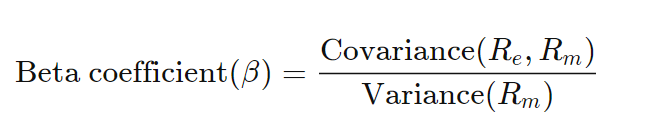

* Re --> Retorno de la empresa
* Rm --> Retorno del mercado 

* La varianza Rm  mide cuanto diferencia de ganacias existen respecto de la media
* La covarianza Re,Rm nos mide cuanto cambia el beneficio de una empresa determina respecto del beneficio del indice de referencia, tipicamente el syp500

Si B>1 Indica que la voltailidad del activo es superior al mercado. 
Esto implica que el riesgo-beneficio es mayor y viceversa.
* Ejemplo de empresas B>1: AMZN,TSLA,APPLE
* B<1 : COKE, JNJ


* Si B<0 NOS indica que el activo esta inversamente correlado con el mercado.

In [ ]:
a.get_beta()

1.1578368665504304

# API batch

In [ ]:
stocks = ["TSLA", "AMZN","MSFT","SPOT"]

In [ ]:
def getCompanyInfo(symbols):
    stock_batch = Stock(symbols,
                        token=api_token)
    company_info = stock_batch.get_company()
    return company_info

In [ ]:
getCompanyInfo(stocks)

,symbol,companyName,exchange,industry,website,description,CEO,securityName,issueType,sector,primarySicCode,employees,tags,address,address2,state,city,zip,country,phone
TSLA,TSLA,Tesla Inc,NASDAQ/NGS (GLOBAL SELECT MARKET),Automobile Manufacturing,https://www.tesla.com/,,Elon Musk,Tesla Inc,cs,Manufacturing,3711,None,"[Consumer Durables, Motor Vehicles, Manufactur...",3500 Deer Creek Rd,None,California,Palo alto,94304-1317,US,16506815000
AMZN,AMZN,Amazon.com Inc.,NASDAQ/NGS (GLOBAL SELECT MARKET),Electronic Shopping and Mail-Order Houses,http://www.amazon.com/,,Jeffrey Bezos,Amazon.com Inc.,cs,Retail Trade,5961,None,"[Retail Trade, Internet Retail]",410 Terry Ave N,None,Washington,Seattle,98109-5210,US,12062661000
MSFT,MSFT,Microsoft Corporation,NASDAQ/NGS (GLOBAL SELECT MARKET),"Data Processing, Hosting, and Related Services",https://www.microsoft.com/en-us,,Satya Nadella,Microsoft Corporation,cs,Information,7372,None,"[Technology Services, Packaged Software, Infor...",1 Microsoft Way,None,Washington,Redmond,98052-6399,US,14258828080
SPOT,SPOT,Spotify Technology S.A.,"NEW YORK STOCK EXCHANGE, INC.",Software Publishers,,,Daniel Ek,Spotify Technology S.A.,cs,Information,4832,None,"[Technology Services, Internet Software/Servic...",None,None,Luxembourg,42-44 avenue de la gare,1610,Luxembourg,46702204607


In [ ]:
def getEarnings(symbol):
    stock_batch = Stock(symbol,
                        token=api_token)
    earnings = stock_batch.get_earnings(last=1)
    return earnings

In [ ]:
getEarnings('MSFT')

IEXQueryError: ignored

In [ ]:
getCompanyInfo(stocks)

,symbol,companyName,exchange,industry,website,description,CEO,securityName,issueType,sector,primarySicCode,employees,tags,address,address2,state,city,zip,country,phone
TSLA,TSLA,Tesla Inc,NASDAQ/NGS (GLOBAL SELECT MARKET),Automobile Manufacturing,https://www.tesla.com/,,Elon Musk,Tesla Inc,cs,Manufacturing,3711,None,"[Consumer Durables, Motor Vehicles, Manufactur...",3500 Deer Creek Rd,None,California,Palo alto,94304-1317,US,16506815000
AMZN,AMZN,Amazon.com Inc.,NASDAQ/NGS (GLOBAL SELECT MARKET),Electronic Shopping and Mail-Order Houses,http://www.amazon.com/,,Jeffrey Bezos,Amazon.com Inc.,cs,Retail Trade,5961,None,"[Retail Trade, Internet Retail]",410 Terry Ave N,None,Washington,Seattle,98109-5210,US,12062661000
MSFT,MSFT,Microsoft Corporation,NASDAQ/NGS (GLOBAL SELECT MARKET),"Data Processing, Hosting, and Related Services",https://www.microsoft.com/en-us,,Satya Nadella,Microsoft Corporation,cs,Information,7372,None,"[Technology Services, Packaged Software, Infor...",1 Microsoft Way,None,Washington,Redmond,98052-6399,US,14258828080
SPOT,SPOT,Spotify Technology S.A.,"NEW YORK STOCK EXCHANGE, INC.",Software Publishers,,,Daniel Ek,Spotify Technology S.A.,cs,Information,4832,None,"[Technology Services, Internet Software/Servic...",None,None,Luxembourg,42-44 avenue de la gare,1610,Luxembourg,46702204607


In [ ]:
from datetime import datetime
from iexfinance.stocks import get_historical_data

start = datetime(2018, 1, 1)
end = datetime(2018, 3, 1)

df = get_historical_data("TSLA", start, end,token=api_token)

IEXQueryError: ignored

In [ ]:
get_historical_data(["AAPL", "TSLA", "MSFT"], output_format='pandas',token=api_token)

IEXQueryError: ignored

In [ ]:
df 

,close,high,low,open,symbol,volume,id,key,subkey,updated,changeOverTime,marketChangeOverTime,uOpen,uClose,uHigh,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2017-01-03,43.398,44.066,42.192,42.972,TSLA,29616270,HISTORICAL_PRICES,TSLA,,1606830572000,-0.074709,-0.074709,214.86,216.99,220.33,210.96,5923254,42.972,43.398,44.066,42.192,29616270,"Jan 3, 17",0.66,0.0154
2017-01-04,45.398,45.6,42.862,42.95,TSLA,56067355,HISTORICAL_PRICES,TSLA,,1606830572000,-0.0320669,-0.0320669,214.75,226.99,228,214.31,11213471,42.95,45.398,45.6,42.862,56067355,"Jan 4, 17",2,0.0461
2017-01-05,45.35,45.496,44.39,45.284,TSLA,29558475,HISTORICAL_PRICES,TSLA,,1606830572000,-0.0330903,-0.0330903,226.42,226.75,227.48,221.95,5911695,45.284,45.35,45.496,44.39,29558475,"Jan 5, 17",-0.048,-0.0011
2017-01-06,45.802,46.062,45.09,45.386,TSLA,27639465,HISTORICAL_PRICES,TSLA,,1606830572000,-0.0234532,-0.0234532,226.93,229.01,230.31,225.45,5527893,45.386,45.802,46.062,45.09,27639465,"Jan 6, 17",0.452,0.01
2017-01-09,46.256,46.384,45.6,45.794,TSLA,19897420,HISTORICAL_PRICES,TSLA,,1606830572000,-0.0137734,-0.0137734,228.97,231.28,231.92,228,3979484,45.794,46.256,46.384,45.6,19897420,"Jan 9, 17",0.454,0.0099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,65.04,66.1843,64.964,65.902,TSLA,21079035,HISTORICAL_PRICES,TSLA,,1606830572000,0.386721,0.386721,329.51,325.2,330.921,324.82,4215807,65.902,65.04,66.1843,64.964,21079035,"Dec 22, 17",-1.292,-0.0195
2017-12-26,63.458,64.788,63.316,64.766,TSLA,21892065,HISTORICAL_PRICES,TSLA,,1606830572000,0.352991,0.352991,323.83,317.29,323.94,316.58,4378413,64.766,63.458,64.788,63.316,21892065,"Dec 26, 17",-1.582,-0.0243
2017-12-27,62.328,63.536,62.15,63.2,TSLA,23560555,HISTORICAL_PRICES,TSLA,,1606830572000,0.328899,0.328899,316,311.64,317.68,310.75,4712111,63.2,62.328,63.536,62.15,23560555,"Dec 27, 17",-1.13,-0.0178
2017-12-28,63.072,63.164,61.908,62.35,TSLA,21581735,HISTORICAL_PRICES,TSLA,,1606830572000,0.344761,0.344761,311.75,315.36,315.82,309.54,4316347,62.35,63.072,63.164,61.908,21581735,"Dec 28, 17",0.744,0.0119


In [ ]:
df1 = df[['close','open','high','low','volume','symbol']]

In [ ]:
df1

,close,open,high,low,volume,symbol
2017-01-03,43.398,42.972,44.066,42.192,29616270,TSLA
2017-01-04,45.398,42.95,45.6,42.862,56067355,TSLA
2017-01-05,45.35,45.284,45.496,44.39,29558475,TSLA
2017-01-06,45.802,45.386,46.062,45.09,27639465,TSLA
2017-01-09,46.256,45.794,46.384,45.6,19897420,TSLA
...,...,...,...,...,...,...
2017-12-22,65.04,65.902,66.1843,64.964,21079035,TSLA
2017-12-26,63.458,64.766,64.788,63.316,21892065,TSLA
2017-12-27,62.328,63.2,63.536,62.15,23560555,TSLA
2017-12-28,63.072,62.35,63.164,61.908,21581735,TSLA


In [ ]:
df

,close,high,low,open,symbol,volume,id,key,subkey,updated,changeOverTime,marketChangeOverTime,uOpen,uClose,uHigh,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2017-01-03,43.398,44.066,42.192,42.972,TSLA,29616270,HISTORICAL_PRICES,TSLA,,1606830572000,-0.074709,-0.074709,214.86,216.99,220.33,210.96,5923254,42.972,43.398,44.066,42.192,29616270,"Jan 3, 17",0.66,0.0154
2017-01-04,45.398,45.6,42.862,42.95,TSLA,56067355,HISTORICAL_PRICES,TSLA,,1606830572000,-0.0320669,-0.0320669,214.75,226.99,228,214.31,11213471,42.95,45.398,45.6,42.862,56067355,"Jan 4, 17",2,0.0461
2017-01-05,45.35,45.496,44.39,45.284,TSLA,29558475,HISTORICAL_PRICES,TSLA,,1606830572000,-0.0330903,-0.0330903,226.42,226.75,227.48,221.95,5911695,45.284,45.35,45.496,44.39,29558475,"Jan 5, 17",-0.048,-0.0011
2017-01-06,45.802,46.062,45.09,45.386,TSLA,27639465,HISTORICAL_PRICES,TSLA,,1606830572000,-0.0234532,-0.0234532,226.93,229.01,230.31,225.45,5527893,45.386,45.802,46.062,45.09,27639465,"Jan 6, 17",0.452,0.01
2017-01-09,46.256,46.384,45.6,45.794,TSLA,19897420,HISTORICAL_PRICES,TSLA,,1606830572000,-0.0137734,-0.0137734,228.97,231.28,231.92,228,3979484,45.794,46.256,46.384,45.6,19897420,"Jan 9, 17",0.454,0.0099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,65.04,66.1843,64.964,65.902,TSLA,21079035,HISTORICAL_PRICES,TSLA,,1606830572000,0.386721,0.386721,329.51,325.2,330.921,324.82,4215807,65.902,65.04,66.1843,64.964,21079035,"Dec 22, 17",-1.292,-0.0195
2017-12-26,63.458,64.788,63.316,64.766,TSLA,21892065,HISTORICAL_PRICES,TSLA,,1606830572000,0.352991,0.352991,323.83,317.29,323.94,316.58,4378413,64.766,63.458,64.788,63.316,21892065,"Dec 26, 17",-1.582,-0.0243
2017-12-27,62.328,63.536,62.15,63.2,TSLA,23560555,HISTORICAL_PRICES,TSLA,,1606830572000,0.328899,0.328899,316,311.64,317.68,310.75,4712111,63.2,62.328,63.536,62.15,23560555,"Dec 27, 17",-1.13,-0.0178
2017-12-28,63.072,63.164,61.908,62.35,TSLA,21581735,HISTORICAL_PRICES,TSLA,,1606830572000,0.344761,0.344761,311.75,315.36,315.82,309.54,4316347,62.35,63.072,63.164,61.908,21581735,"Dec 28, 17",0.744,0.0119


In [ ]:
from iexfinance.stocks import Stock
aapl = Stock("AAPL", output_format='pandas',token=api_token)


In [ ]:
aapl.get_quote()

,avgTotalVolume,calculationPrice,change,changePercent,close,closeSource,closeTime,companyName,delayedPrice,delayedPriceTime,extendedChange,extendedChangePercent,extendedPrice,extendedPriceTime,high,highSource,highTime,iexAskPrice,iexAskSize,iexBidPrice,iexBidSize,iexClose,iexCloseTime,iexLastUpdated,iexMarketPercent,iexOpen,iexOpenTime,iexRealtimePrice,iexRealtimeSize,iexVolume,isUSMarketOpen,lastTradeTime,latestPrice,latestSource,latestTime,latestUpdate,latestVolume,low,lowSource,lowTime,marketCap,oddLotDelayedPrice,oddLotDelayedPriceTime,open,openSource,openTime,peRatio,previousClose,previousVolume,primaryExchange,symbol,volume,week52High,week52Low,ytdChange
AAPL,96000409,close,-0.07,-0.00055,None,official,None,Apple Inc,None,None,None,None,None,None,None,None,None,0,0,0,0,127.715,1608152396696,1608152396696,47.8788,127.715,1608152396696,127.715,3,1615095,False,1608152396696,127.81,Close,"December 16, 2020",1608152400539,None,None,None,None,2173000313620,None,None,None,official,None,38.97,127.88,157572262,NASDAQ/NGS (GLOBAL SELECT MARKET),AAPL,None,133.95,55.74,0.75547


In [ ]:
air = Stock(["AAL", "LUV", "DAL"], output_format='pandas',token=api_token)
air.get_quote()

,symbol,companyName,primaryExchange,calculationPrice,open,openTime,openSource,close,closeTime,closeSource,high,highTime,highSource,low,lowTime,lowSource,latestPrice,latestSource,latestTime,latestUpdate,latestVolume,iexRealtimePrice,iexRealtimeSize,iexLastUpdated,delayedPrice,delayedPriceTime,oddLotDelayedPrice,oddLotDelayedPriceTime,extendedPrice,extendedChange,extendedChangePercent,extendedPriceTime,previousClose,previousVolume,change,changePercent,volume,iexMarketPercent,iexVolume,avgTotalVolume,iexBidPrice,iexBidSize,iexAskPrice,iexAskSize,iexOpen,iexOpenTime,iexClose,iexCloseTime,marketCap,peRatio,week52High,week52Low,ytdChange,lastTradeTime,isUSMarketOpen
AAL,AAL,American Airlines Group Inc,NASDAQ/NGS (GLOBAL SELECT MARKET),close,None,None,official,None,None,official,None,None,None,None,None,None,16.86,Close,"December 16, 2020",1608152400448,None,16.855,140,1608152396189,None,None,None,None,None,None,None,None,17.01,89217037,-0.15,-0.00882,None,6.9631,514650,99996841,0,0,0,0,16.855,1608152396189,16.855,1608152396189,10200279937,-1.21,30.47,9.04,-0.418781,1608152398002,False
LUV,LUV,Southwest Airlines Co,"NEW YORK STOCK EXCHANGE, INC.",close,None,None,official,None,None,official,None,1608152389079,15 minute delayed price,None,1608133825170,15 minute delayed price,45.73,Close,"December 16, 2020",1608152402265,None,45.705,30,1608152392776,None,None,None,None,None,None,None,None,46.42,5975746,-0.69,-0.01486,None,0.0141654,91251,8569411,0,0,0,0,45.705,1608152392776,45.705,1608152392776,26993187354,-15.19,58.32,23.87,-0.164433,1608152392776,False
DAL,DAL,"Delta Air Lines, Inc.","NEW YORK STOCK EXCHANGE, INC.",close,None,None,official,None,None,official,None,1608152389089,15 minute delayed price,None,1608134057064,15 minute delayed price,41.08,Close,"December 16, 2020",1608152402525,None,41.07,100,1608152386709,None,None,None,None,None,None,None,None,41.85,11453773,-0.77,-0.0184,None,1858.19,711686,14806618,0,0,0,0,41.07,1608152386709,41.07,1608152386709,26198125085,-2.49,61.6,19.19,-0.311089,1608152389088,False


IEXAuthenticationError: ignored

# Alphavantage

# ¿Por que AlphaVantage?


*   Capa gratuita.(5 peticiones por minuto y 500 peticiones en un día)
*   Nos da cierta información de manera gratuita que IEX no(Información  sobre sectoress)
* Información sobre Criptomonedas y Forex de manera gratuita







In [ ]:
!pip install alpha_vantage
api_key ='VQDF8G5G0NBESG0D'

     |████████████████████████████████| 1.3MB 6.5MB/s 
     |████████████████████████████████| 143kB 18.9MB/s 
     |████████████████████████████████| 296kB 14.9MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25705 sha256=eb0674aed0437bcd6cf0a4ff126b42d4900010901cbab65db3d392d42873a04b
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=2d135ca6856411df255b733ee8d080c4919d58d76395cce473fa9bcb3bf3e83d
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AMZN',interval='60min', outputsize='compact')
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-12-18 20:00:00,3220.310,3229.45,3220.31,3229.45,11193.0
2020-12-18 19:00:00,3214.560,3221.50,3213.98,3221.50,11609.0
2020-12-18 18:00:00,3211.100,3215.00,3201.65,3214.50,94323.0
2020-12-18 17:00:00,3201.650,3212.08,3200.00,3212.08,320966.0
2020-12-18 16:00:00,3185.185,3207.03,3175.00,3201.07,1286401.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-12-18 20:00:00 to 2020-12-10 09:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [ ]:
meta_data

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'AMZN',
 '3. Last Refreshed': '2020-12-18 20:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

# Intervalos en dataday 
1min, 5min, 15min, 30min, 60min

In [ ]:
ts.get_daily(symbol='AMZN')

(            1. open    2. high   3. low  4. close  5. volume
 date                                                        
 2020-12-18  3243.99  3249.4200  3171.60   3201.65  5995713.0
 2020-12-17  3250.00  3263.5100  3221.00   3236.08  3474347.0
 2020-12-16  3176.01  3247.0000  3163.68   3240.96  4427616.0
 2020-12-15  3181.01  3188.4999  3130.49   3165.12  3323686.0
 2020-12-14  3143.00  3190.4700  3126.00   3156.97  4155794.0
 ...             ...        ...      ...       ...        ...
 2020-08-05  3143.77  3213.5859  3127.30   3205.03  3930025.0
 2020-08-04  3101.21  3167.2400  3101.21   3138.83  4694294.0
 2020-08-03  3180.51  3184.0000  3104.00   3111.89  5074663.0
 2020-07-31  3244.00  3246.8200  3151.00   3164.68  8083369.0
 2020-07-30  3014.00  3092.0000  3005.00   3051.88  6128265.0
 
 [100 rows x 5 columns],
 {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AMZN',
  '3. Last Refreshed': '2020-12-18',
  '4. Output Size': 'Compact',
  '

In [ ]:
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min',outputsize='compact')

In [ ]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-12-17 20:00:00,218.45,218.50,218.45,218.50,841.0
2020-12-17 19:59:00,218.50,218.50,218.45,218.45,1023.0
2020-12-17 19:57:00,218.45,218.45,218.45,218.45,443.0
2020-12-17 19:50:00,218.40,218.40,218.40,218.40,343.0
2020-12-17 19:49:00,218.34,218.34,218.34,218.34,509.0


# Uso de Request

In [ ]:
import requests as rq
params ={'function':'TIME_SERIES_INTRADAY_EXTENDED','symbol':'MSFT','interval':'15min','slice':'year1month1','apikey':api_key,'datatype':'json'}
data = rq.get('https://www.alphavantage.co/query',params=params)

In [ ]:
data.content


b'time,open,high,low,close,volume\r\n2020-12-17 20:00:00,218.34,218.5,218.34,218.5,4929\r\n2020-12-17 19:45:00,218.12,218.35,218.01,218.35,1575\r\n2020-12-17 19:30:00,218.3201,218.36,218.24,218.25,1870\r\n2020-12-17 19:15:00,218.4,218.4,218.36,218.37,3839\r\n2020-12-17 19:00:00,218.4,218.4,218.36,218.4,10862\r\n2020-12-17 18:45:00,218.38,218.4,218.14,218.4,4595\r\n2020-12-17 18:30:00,218.65,218.72,218.2,218.2,10571\r\n2020-12-17 18:15:00,218.25,218.73,218.25,218.6299,4809\r\n2020-12-17 18:00:00,217.75,218.43,217.66,218.2,20197\r\n2020-12-17 17:45:00,219.29,219.29,217.5,217.76,41634\r\n2020-12-17 17:30:00,219.27,219.28,219.25,219.25,1084\r\n2020-12-17 17:15:00,219.31,219.3102,219.26,219.26,1826\r\n2020-12-17 17:00:00,219.3,219.3602,219.3,219.3602,1241482\r\n2020-12-17 16:45:00,219.25,219.3,219.25,219.2575,75763\r\n2020-12-17 16:30:00,219.42,219.45,219.3,219.3,335267\r\n2020-12-17 16:15:00,219.42,219.68,219.25,219.42,1758833\r\n2020-12-17 16:00:00,218.785,219.5,218.6,219.42,2221577\r\n20

# Información por Sectores.

In [ ]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt
sp = SectorPerformances(key=api_key, output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000
mean,-0.005064,-0.005064,0.004591,0.017236,0.093073,0.074318,0.088827,0.250709,0.644460,1.685590
std,0.007553,0.007553,0.019287,0.036715,0.048101,0.207630,0.210446,0.362588,0.622244,1.442732
min,-0.018300,-0.018300,-0.042600,-0.050900,0.000700,-0.357400,-0.344500,-0.424000,-0.341900,-0.402300
25%,-0.008250,-0.008250,0.000700,0.007450,0.064400,-0.053900,-0.028800,0.107150,0.442575,0.949350
50%,-0.003400,-0.003400,0.002100,0.028200,0.086800,0.088600,0.092000,0.188400,0.533200,1.272100
75%,0.000300,0.000300,0.015050,0.031300,0.127650,0.192800,0.206850,0.346500,0.663025,2.312750
max,0.005100,0.005100,0.032000,0.076700,0.156800,0.397800,0.427300,1.010000,2.106500,4.586900


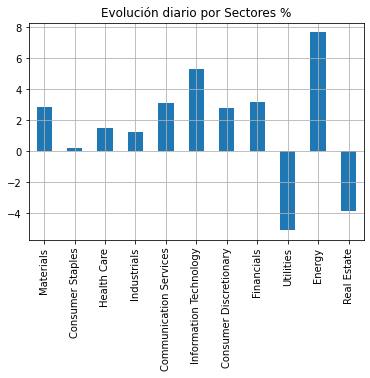

In [ ]:
(data['Rank D: Month Performance']*100).plot(kind='bar')
plt.title('Evolución diario por Sectores %')
plt.grid()
plt.show()

# Indicadores Tecnicos

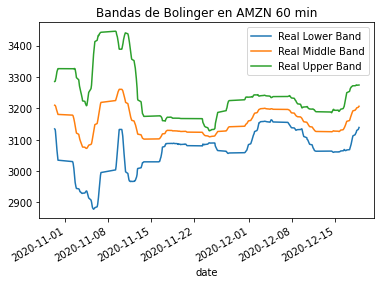

In [ ]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='AMZN', interval='60min', time_period=60)
data.plot()
plt.title('Bandas de Bolinger en AMZN 60 min')
plt.show()

Text(0.5, 1.0, 'ATR AMZN en Intervalo de 60 min calculado segun 60 Periodos.')

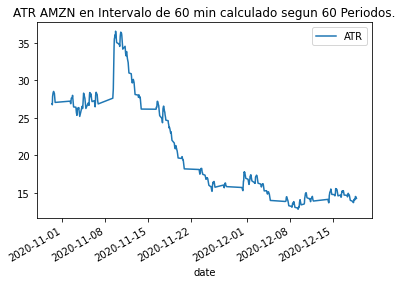

In [ ]:
data , meta_data = ti.get_atr(symbol='AMZN',interval='60min',time_period=60)
data.plot()
plt.title('ATR AMZN en Intervalo de 60 min calculado segun 60 Periodos.')

El ATR(Averge True Range) mide la flutación del precio, es decir la volatilidad.
* Nos ayuda para establecer los stops de ventas.
* Es útil para en operaciones de corta duración establecer los take profits.
* Ejemplo: Viendo el gráfico de AMZN vemos que el ATR está entorno a 15 de media en las ultimas sesiones. Podemos definir nuestro stop en 3 ATR es decir estaremos ariesgado en la operaci
45/3240

In [ ]:
((3*15)/3240)*100

1.3888888888888888

In [ ]:
data

,ATR
date,
2020-10-30 08:00:00,26.8813
2020-10-30 09:00:00,26.7499
2020-10-30 10:00:00,27.8538
2020-10-30 11:00:00,28.1338
2020-10-30 12:00:00,28.3387
...,...
2020-12-18 16:00:00,14.5286
2020-12-18 17:00:00,14.4878
2020-12-18 18:00:00,14.4689


# Media Movil

In [ ]:
data,meta_data= ti.get_sma(symbol='AMZN',interval='daily',time_period=10,series_type='close')
price = data_p, meta_data = ts.get_daily(symbol='AMZN',outputsize='compact')

In [ ]:
price

(            1. open    2. high   3. low  4. close  5. volume
 date                                                        
 2020-12-18  3243.99  3249.4200  3171.60   3201.65  5995713.0
 2020-12-17  3250.00  3263.5100  3221.00   3236.08  3474347.0
 2020-12-16  3176.01  3247.0000  3163.68   3240.96  4427616.0
 2020-12-15  3181.01  3188.4999  3130.49   3165.12  3323686.0
 2020-12-14  3143.00  3190.4700  3126.00   3156.97  4155794.0
 ...             ...        ...      ...       ...        ...
 2020-08-05  3143.77  3213.5859  3127.30   3205.03  3930025.0
 2020-08-04  3101.21  3167.2400  3101.21   3138.83  4694294.0
 2020-08-03  3180.51  3184.0000  3104.00   3111.89  5074663.0
 2020-07-31  3244.00  3246.8200  3151.00   3164.68  8083369.0
 2020-07-30  3014.00  3092.0000  3005.00   3051.88  6128265.0
 
 [100 rows x 5 columns],
 {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AMZN',
  '3. Last Refreshed': '2020-12-18',
  '4. Output Size': 'Compact',
  '

In [ ]:
data

,SMA
date,
1999-11-12,69.813
1999-11-15,70.250
1999-11-16,71.500
1999-11-17,72.569
1999-11-18,74.057
...,...
2020-12-14,3158.729
2020-12-15,3153.233
2020-12-16,3156.976


# Obter Información de Criptomonedas

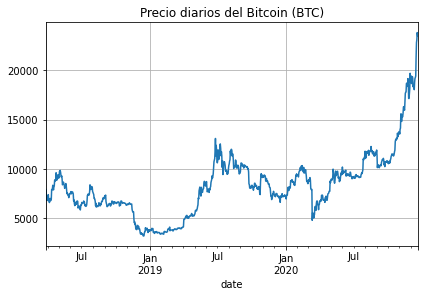

In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

cc = CryptoCurrencies(key=api_key, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Precio diarios del Bitcoin (BTC)')
plt.grid()
plt.show()

In [ ]:
data

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2020-12-20,155793.2640,23821.60,155890.5792,23836.48,151924.2000,23230.00,153784.1106,23514.39,6233.745210,6233.745210
2020-12-19,151122.3306,23107.39,158081.4138,24171.47,148785.0000,22750.00,155793.3294,23821.61,86045.064677,86045.064677
2020-12-18,149093.3610,22797.15,152285.0772,23285.18,146169.0000,22350.00,151122.3306,23107.39,79646.134315,79646.134315
2020-12-17,139534.3008,21335.52,155652.0000,23800.00,138844.2000,21230.00,149093.4264,22797.16,184882.476748,184882.476748
2020-12-16,127048.8522,19426.43,141002.4000,21560.00,126082.0440,19278.60,139534.3008,21335.52,114306.335570,114306.335570
...,...,...,...,...,...,...,...,...,...,...
2018-03-31,44735.1696,6840.24,47240.7744,7223.36,44321.5800,6777.00,45282.3714,6923.91,36868.539087,36868.539087
2018-03-30,46369.6464,7090.16,47692.4922,7292.43,43164.6540,6600.10,44735.1042,6840.23,65306.031976,65306.031976
2018-03-29,51988.4220,7949.30,52156.5000,7975.00,45394.8594,6941.11,46369.5156,7090.14,54620.915125,54620.915125


In [ ]:
cc = CryptoCurrencies(key=api_key, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='ETH', market='CNY')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Precio diarios del Etherum (ETC)')
plt.grid()
plt.show()

# Forex

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
cc = ForeignExchange(key=api_key)
# There is no metadata in this call
data, _ = cc.get_currency_exchange_intraday(from_symbol='EUR',to_symbol='USD',interval='1min',outputsize='full')

In [ ]:
data

{'2020-12-20 17:57:00': {'1. open': '1.2252',
  '2. high': '1.2252',
  '3. low': '1.2252',
  '4. close': '1.2252'},
 '2020-12-20 17:58:00': {'1. open': '1.2251',
  '2. high': '1.2251',
  '3. low': '1.2250',
  '4. close': '1.2250'},
 '2020-12-20 17:59:00': {'1. open': '1.2250',
  '2. high': '1.2250',
  '3. low': '1.2250',
  '4. close': '1.2250'},
 '2020-12-20 18:00:00': {'1. open': '1.2248',
  '2. high': '1.2248',
  '3. low': '1.2248',
  '4. close': '1.2248'},
 '2020-12-20 18:01:00': {'1. open': '1.2247',
  '2. high': '1.2247',
  '3. low': '1.2247',
  '4. close': '1.2247'},
 '2020-12-20 18:02:00': {'1. open': '1.2247',
  '2. high': '1.2247',
  '3. low': '1.2247',
  '4. close': '1.2247'},
 '2020-12-20 18:03:00': {'1. open': '1.2247',
  '2. high': '1.2247',
  '3. low': '1.2247',
  '4. close': '1.2247'},
 '2020-12-20 18:04:00': {'1. open': '1.2247',
  '2. high': '1.2247',
  '3. low': '1.2247',
  '4. close': '1.2247'},
 '2020-12-20 18:05:00': {'1. open': '1.2247',
  '2. high': '1.2247',
  '

# Uso de Yahoo Finance

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 10.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=3d7f170bd71d784a08237d4f78752e53703982ffa2f4516403f5f2b2e2573c6e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

{'52WeekChange': 0.40419483,
 'SandP52WeekChange': 0.35078752,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 289.54,
 'askSize': 1200,
 'averageDailyVolume10Day': 26505885,
 'averageVolume': 24938322,
 'averageVolume10days': 26505885,
 'beta': 0.787812,
 'beta3Year': None,
 'bid': 289.52,
 'bidSize': 800,
 'bookValue': 17.853,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 289.1,
 'currentRatio': 2.294,
 'dateShortInterest': 1626307200,
 'dayHigh': 290.15,
 'dayLow': 283.8303,
 'debtToEquity': 60.414,
 'dividendRate': 2.24,
 'dividendYield': 0.0077,
 'earningsGrowth': 0.45,
 'earningsQuarterlyGrowth': 0.438,
 'ebitda': 75577999360,
 'ebitdaMargins': 0.47245,
 'enterpriseToEbitda': 28.226,
 'enterpriseToRevenue': 13.335,
 'enterpriseValue': 2133248573440,
 'exDividendDate': 1629244800,
 'exchange

In [3]:
hist = msft.history(period="max") # Es interesante observar como tenemos datos desde 1986!!!!

In [ ]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,1031788800,0.0,0.0
1986-03-14,0.061893,0.065209,0.061893,0.064103,308160000,0.0,0.0
1986-03-17,0.064103,0.065761,0.064103,0.065209,133171200,0.0,0.0
1986-03-18,0.065209,0.065761,0.062998,0.063551,67766400,0.0,0.0
1986-03-19,0.063551,0.064103,0.061893,0.062446,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-14,213.100006,216.210007,212.880005,214.199997,28798400,0.0,0.0
2020-12-15,215.169998,215.419998,212.240005,214.130005,27018100,0.0,0.0
2020-12-16,214.750000,220.110001,214.720001,219.279999,35023300,0.0,0.0


In [ ]:
msft.recommendations.tail(10)

,Firm,To Grade,From Grade,Action
Date,,,,
2020-10-13 16:40:00,RBC Capital,Outperform,,main
2020-10-14 10:49:23,UBS,Buy,,init
2020-10-20 16:25:09,Stifel,Buy,,main
2020-10-23 16:26:29,Barclays,Overweight,,main
2020-10-28 09:02:04,Piper Sandler,Overweight,,main
2020-10-28 12:00:17,Morgan Stanley,Overweight,,main
2020-10-28 13:22:56,Credit Suisse,Outperform,,main
2020-10-29 16:00:20,Deutsche Bank,Buy,,main
2020-11-05 10:48:37,Oppenheimer,Outperform,Perform,up


In [ ]:
msft.get_actions()

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2019-11-20,0.51,0.0
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0


In [ ]:
msft.get_mutualfund_holders().tail()

,Holder,Shares,Date Reported,% Out,Value
5,Vanguard Institutional Index Fund-Institutiona...,64948753,2020-09-29,0.0086,13660671218
6,Vanguard Growth Index Fund,59952438,2020-09-29,0.0079,12609796284
7,iShares Core S&P 500 ETF,59107487,2020-11-29,0.0078,12653139742
8,Growth Fund Of America Inc,53569352,2020-09-29,0.0071,11267241806
9,Washington Mutual Investors Fund,35049830,2020-09-29,0.0046,7372030743


In [ ]:
msft.calendar

,0,1
Earnings Date,2021-01-27 00:00:00,2021-02-01 00:00:00
Earnings Average,1.64,1.64
Earnings Low,1.57,1.57
Earnings High,1.86,1.86
Revenue Average,40190400000,40190400000
Revenue Low,39888000000,39888000000
Revenue High,41145000000,41145000000


In [ ]:
msft.

# Finhub

In [ ]:

api='br38tm7rh5rai6tgfp40'

# ¿Por que Fibhub?

* Capa Gratuita
* STOCK ESTIMATES Data
* STOCK PRICE data
* ETFS & INDICES data 
* FOREX 
* Crypto 
* TECHNICAL ANALYSIS


In [ ]:
import requests
import pandas as pd
r = requests.get('https://finnhub.io/api/v1/stock/profile2?symbol=AAPL&token=br38tm7rh5rai6tgfp40')
a = r.json()
print(r.json())

{'country': 'US', 'currency': 'USD', 'exchange': 'NASDAQ NMS - GLOBAL MARKET', 'finnhubIndustry': 'Technology', 'ipo': '1980-12-12', 'logo': 'https://static.finnhub.io/logo/87cb30d8-80df-11ea-8951-00000000092a.png', 'marketCapitalization': 2103973, 'name': 'Apple Inc', 'phone': '14089961010', 'shareOutstanding': 17001.802, 'ticker': 'AAPL', 'weburl': 'https://www.apple.com/'}


In [ ]:
a.get('name')

'Apple Inc'

In [ ]:
df=pd.DataFrame.from_dict(a,orient="index")
df.tail()

,0
name,Apple Inc
phone,14089961010
shareOutstanding,17001.8
ticker,AAPL
weburl,https://www.apple.com/


# Noticias Empresas

In [ ]:
r = requests.get('https://finnhub.io/api/v1/company-news?symbol=AAPL&from=2020-11-10&to=2020-12-20&token=br38tm7rh5rai6tgfp40')
print(r.json())

[{'category': 'company', 'datetime': 1608508800, 'headline': 'Apple vs Tesla? Apple Self-Driving Car To Hit Market In 2024, Says Reuters', 'id': 61811172, 'image': 'https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5fe111abcd65b06171600516%2F0x0.jpg', 'related': 'AAPL', 'source': 'https://www.forbes.com', 'summary': 'Project Titan lives? Get ready for the clash of the titans: Apple vs Tesla.', 'url': 'https://www.forbes.com/sites/johnkoetsier/2020/12/21/apple-vs-tesla-apple-self-driving-car-to-hit-market-in-2024-says-reuters/'}, {'category': 'company', 'datetime': 1608508800, 'headline': 'Apple Hospitality REIT Enhances Corporate Responsibility Disclosures', 'id': 61803462, 'image': 'https://mms.businesswire.com/media/20201221005386/en/466699/21/AHREIT_rgb_for_Business_Wire.jpg', 'related': 'AAPL', 'source': 'businesswire', 'summary': 'Apple Hospitality REIT Enhances Corporate Responsibility Disclosures

In [ ]:
news = r.json()

In [ ]:
df_news=pd.DataFrame(news)
df_news.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,1608508800,Apple vs Tesla? Apple Self-Driving Car To Hit ...,61811172,https://thumbor.forbes.com/thumbor/fit-in/1200...,AAPL,https://www.forbes.com,Project Titan lives? Get ready for the clash o...,https://www.forbes.com/sites/johnkoetsier/2020...
1,company,1608508800,Apple Hospitality REIT Enhances Corporate Resp...,61803462,https://mms.businesswire.com/media/20201221005...,AAPL,businesswire,Apple Hospitality REIT Enhances Corporate Resp...,https://www.businesswire.com/news/home/2020122...
2,company,1608505500,L.A. hospitals consider rationing care as coro...,61799599,https://images.mktw.net/im-275966/social,AAPL,marketwatch,Medical staffing is stretched increasingly thi...,https://www.marketwatch.com/story/l-a-hospital...
3,company,1608500072,Apple puts supplier Wistron on notice after In...,61800042,https://www.theglobeandmail.com/resizer/INaPUf...,AAPL,https://www.theglobeandmail.com,Contract workers angry over unpaid wages destr...,https://www.theglobeandmail.com/business/inter...
4,company,1608497379,Report: gov't spyware targets phones of Al-Jaz...,61798371,https://s.abcnews.com/images/International/Wir...,AAPL,abcnews,A cybersecurity watchdog says dozens of journa...,https://abcnews.go.com/Business/wireStory/repo...


In [ ]:
df_news_filter = df_news[['headline','datetime','related','source','summary']]

In [ ]:
df_news_filter

,headline,datetime,related,source,summary
0,Apple vs Tesla? Apple Self-Driving Car To Hit ...,1608508800,AAPL,https://www.forbes.com,Project Titan lives? Get ready for the clash o...
1,Apple Hospitality REIT Enhances Corporate Resp...,1608508800,AAPL,businesswire,Apple Hospitality REIT Enhances Corporate Resp...
2,L.A. hospitals consider rationing care as coro...,1608505500,AAPL,marketwatch,Medical staffing is stretched increasingly thi...
3,Apple puts supplier Wistron on notice after In...,1608500072,AAPL,https://www.theglobeandmail.com,Contract workers angry over unpaid wages destr...
4,Report: gov't spyware targets phones of Al-Jaz...,1608497379,AAPL,abcnews,A cybersecurity watchdog says dozens of journa...
...,...,...,...,...,...
195,Apple versus Facebook battle could see both co...,1608215806,AAPL,https://9to5mac.com,The Apple versus Facebook battle escalated qui...
196,Europe Clears Google-Fitbit Deal. So Long as I...,1608214200,AAPL,MarketWatch,The approval comes after a monthslong investig...
197,La montre connectée reste un cadeau idéal,1608213609,AAPL,https://www.boursorama.com,"Sortie de la case gadget, la montre connectée ..."
198,"Facebook and Apple Are Sparring Over Ads, Priv...",1608213120,AAPL,MarketWatch,Facebook says changes to Apple’s latest mobile...


# Fundamentales

In [ ]:
import requests
r = requests.get('https://finnhub.io/api/v1/stock/metric?symbol=AAPL&metric=all&token=br38tm7rh5rai6tgfp40')
print(r.json())

{'metric': {'10DayAverageTradingVolume': 99.55453, '13WeekPriceReturnDaily': 2.30655, '26WeekPriceReturnDaily': 48.44359, '3MonthAverageTradingVolume': 2807.93272, '52WeekHigh': 137.98, '52WeekHighDate': '2020-09-02', '52WeekLow': 53.1525, '52WeekLowDate': '2020-03-23', '52WeekPriceReturnDaily': 82.8525, '5DayPriceReturnDaily': 3.94792, 'assetTurnoverAnnual': 0.82884, 'assetTurnoverTTM': 0.82884, 'beta': 1.27192, 'bookValuePerShareAnnual': 3.84873, 'bookValuePerShareQuarterly': 3.84873, 'bookValueShareGrowth5Y': -6.37004, 'capitalSpendingGrowth5Y': -8.64702, 'cashFlowPerShareAnnual': 3.9061, 'cashFlowPerShareTTM': 3.9061, 'cashPerSharePerShareAnnual': 5.35691, 'cashPerSharePerShareQuarterly': 5.35691, 'currentDividendYieldTTM': 0.64242, 'currentEv/freeCashFlowAnnual': 45.16275, 'currentEv/freeCashFlowTTM': 45.16275, 'currentRatioAnnual': 1.3636, 'currentRatioQuarterly': 1.3636, 'dividendGrowthRate5Y': 9.83445, 'dividendPerShare5Y': 0.674, 'dividendPerShareAnnual': 0.795, 'dividendYield

In [ ]:
type(r.json())

dict

In [ ]:
print(r.json().get('metric'))

{'10DayAverageTradingVolume': 99.55453, '13WeekPriceReturnDaily': 2.30655, '26WeekPriceReturnDaily': 48.44359, '3MonthAverageTradingVolume': 2807.93272, '52WeekHigh': 137.98, '52WeekHighDate': '2020-09-02', '52WeekLow': 53.1525, '52WeekLowDate': '2020-03-23', '52WeekPriceReturnDaily': 82.8525, '5DayPriceReturnDaily': 3.94792, 'assetTurnoverAnnual': 0.82884, 'assetTurnoverTTM': 0.82884, 'beta': 1.27192, 'bookValuePerShareAnnual': 3.84873, 'bookValuePerShareQuarterly': 3.84873, 'bookValueShareGrowth5Y': -6.37004, 'capitalSpendingGrowth5Y': -8.64702, 'cashFlowPerShareAnnual': 3.9061, 'cashFlowPerShareTTM': 3.9061, 'cashPerSharePerShareAnnual': 5.35691, 'cashPerSharePerShareQuarterly': 5.35691, 'currentDividendYieldTTM': 0.64242, 'currentEv/freeCashFlowAnnual': 45.16275, 'currentEv/freeCashFlowTTM': 45.16275, 'currentRatioAnnual': 1.3636, 'currentRatioQuarterly': 1.3636, 'dividendGrowthRate5Y': 9.83445, 'dividendPerShare5Y': 0.674, 'dividendPerShareAnnual': 0.795, 'dividendYield5Y': 1.1615

In [ ]:
metricas = r.json().get('metric')

In [ ]:
df=pd.DataFrame.from_dict(metricas,orient="index")

In [ ]:
df.head(20)

,0
10DayAverageTradingVolume,99.5545
13WeekPriceReturnDaily,2.30655
26WeekPriceReturnDaily,48.4436
3MonthAverageTradingVolume,2807.93
52WeekHigh,137.98
52WeekHighDate,2020-09-02
52WeekLow,53.1525
52WeekLowDate,2020-03-23
52WeekPriceReturnDaily,82.8525
5DayPriceReturnDaily,3.94792


# Identificación de Soportes/Resistencias

In [ ]:
r = requests.get('https://finnhub.io/api/v1/scan/support-resistance?symbol=AAPL&resolution=D&token=br38tm7rh5rai6tgfp40')
print(r.json())

{'levels': [66.36000061035156, 83.13999938964844, 99.94999694824219, 117.62999725341797, 137.97999572753906]}


# Reconocimiento de Patrones

In [ ]:
import requests
r = requests.get('https://finnhub.io/api/v1/scan/pattern?symbol=AMZN&resolution=D&token=br38tm7rh5rai6tgfp40')
print(r.json())

{'points': [{'aprice': 3365.5200195312, 'atime': 1604534400, 'bprice': 3020, 'btime': 1604966400, 'cprice': 3248.9499511719, 'ctime': 1606780800, 'dprice': 3072.8200683594, 'dtime': 1607644800, 'entry': 3173.52225988059, 'entry_date': 1608076800, 'intersect_price': 3104.270438028712, 'intersect_time': 1609027200, 'mature': 1, 'patternname': 'Triangle', 'patterntype': 'bullish', 'profit1': 3519.04227941179, 'profit2': 0, 'sortTime': 1607644800, 'status': 'complete', 'stoploss': 3016.98, 'symbol': 'AMZN.US', 'terminal': 0}, {'aprice': 2871, 'atime': 1600646400, 'bprice': 3133.9899902344, 'btime': 1600732800, 'cprice': 2965, 'ctime': 1600905600, 'dprice': 0, 'dtime': 0, 'end_price': 3133.9899902344, 'end_time': 1601251200, 'entry': 3133.98999023, 'eprice': 0, 'etime': 0, 'mature': 0, 'patternname': 'Double Bottom', 'patterntype': 'bullish', 'profit1': 3396.97998047, 'profit2': 0, 'sortTime': 1601251200, 'start_price': 3133.9899902344, 'start_time': 1600214400, 'status': 'successful', 'sto